In [1]:
from fastai.vision.all import *
import gradio as gr
import timm

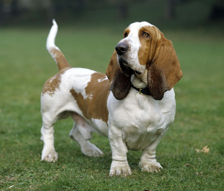

In [5]:
im = PILImage.create('basset.jpg')
im.thumbnail((224, 224))
im

In [6]:
learn = load_learner('breed_model.pkl')

In [7]:
learn.predict('basset.jpg')

('basset_hound',
 tensor(14),
 tensor([1.5111e-07, 9.8931e-09, 2.0148e-10, 3.3501e-10, 4.5111e-09, 1.7550e-08,
         1.0715e-08, 4.5443e-09, 8.9104e-10, 3.7553e-09, 7.5826e-08, 4.6479e-09,
         1.0448e-06, 5.2671e-08, 9.9943e-01, 2.6312e-04, 1.9668e-10, 1.7658e-08,
         3.0304e-04, 1.4419e-08, 3.0731e-08, 8.8281e-10, 2.2223e-07, 3.8956e-08,
         1.9416e-08, 5.1098e-10, 7.3089e-10, 1.1494e-09, 3.0407e-09, 1.3461e-08,
         8.7606e-07, 2.0719e-08, 1.7117e-08, 1.2087e-09, 1.1160e-09, 1.5923e-08,
         1.9659e-10]))

In [14]:
categories = learn.dls.vocab

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [15]:
classify_image('basset.jpg')

{'Abyssinian': 1.5110809670204617e-07,
 'Bengal': 9.893088126489147e-09,
 'Birman': 2.0147801482739425e-10,
 'Bombay': 3.3501063034790945e-10,
 'British_Shorthair': 4.511082174474268e-09,
 'Egyptian_Mau': 1.754956002741892e-08,
 'Maine_Coon': 1.0714641618392307e-08,
 'Persian': 4.544295606478954e-09,
 'Ragdoll': 8.910370774550813e-10,
 'Russian_Blue': 3.755329380794592e-09,
 'Siamese': 7.582563910091267e-08,
 'Sphynx': 4.647874085605963e-09,
 'american_bulldog': 1.0448227385495557e-06,
 'american_pit_bull_terrier': 5.267115810170253e-08,
 'basset_hound': 0.9994311928749084,
 'beagle': 0.00026312374393455684,
 'boxer': 1.9668469630751417e-10,
 'chihuahua': 1.7658045692314772e-08,
 'english_cocker_spaniel': 0.0003030433726962656,
 'english_setter': 1.4418649385561366e-08,
 'german_shorthaired': 3.073101950690216e-08,
 'great_pyrenees': 8.828088815526769e-10,
 'havanese': 2.2223359508188878e-07,
 'japanese_chin': 3.89556049640305e-08,
 'keeshond': 1.941592486787158e-08,
 'leonberger': 5.1

In [10]:
image = gr.inputs.Image((192, 192))
label = gr.outputs.Label()
examples = ['basset.jpg']

C:\Users\Nifdi Guliyev\anaconda3\lib\site-packages\gradio\inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Nifdi Guliyev\anaconda3\lib\site-packages\gradio\inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
C:\Users\Nifdi Guliyev\anaconda3\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\Nifdi Guliyev\anaconda3\lib\site-packages\gradio\outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


In [11]:
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [16]:
m = learn.model

In [17]:
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (norm): Identity()
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_path): Identity()
          

In [20]:
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

[Parameter containing:
 tensor([ 1.2555e+00,  1.9174e+00,  1.2195e+00,  1.0376e+00, -1.1278e-03,
          7.6647e-01,  8.8708e-01,  1.6304e+00,  7.0573e-01,  3.2893e+00,
          7.8528e-01, -1.4520e-03,  1.0007e+00, -2.2499e-03,  3.2972e+00,
         -9.1179e-04,  1.9841e+00,  1.0208e+00,  4.4523e+00,  2.5571e-01,
          2.7257e+00,  9.2508e-01,  1.2365e+00,  3.4305e-03,  1.7867e+00,
          5.4309e-01,  4.6252e+00,  1.1504e-02, -5.8160e-04,  3.4505e+00,
          1.3516e+00,  4.1271e+00,  2.6875e+00,  4.1213e+00,  3.4007e+00,
          8.5015e-01,  7.3581e-01,  3.9801e+00,  1.2861e+00,  6.4055e-01,
          2.6906e+00,  1.1189e+00,  1.1700e+00,  5.5229e-01,  2.3347e+00,
          1.0214e-03,  9.6856e-01,  2.1676e-03,  1.1995e+00,  1.7876e+00,
          4.0176e-01,  4.5011e-01,  9.7088e-01,  3.9889e+00,  6.5831e-01,
          6.8824e-01,  9.8559e-01,  2.7048e+00,  1.2154e+00,  7.6268e-01,
          3.3011e+00,  1.6199e+00,  9.5533e-01,  2.1204e+00,  6.2942e-01,
          4.034